In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson 

distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the 

probability of cars waiting at the drive-up window.

What is the probability that no cars drive up in the noon hour?

What is the probability that 3 or more cars come through the drive through?

How likely is it that the drive through gets at least 1 car?

In [8]:
#simulating with python:

average = 2
size = 100_000
trials = np.random.poisson(average, size)
(trials == 0).mean() # probability of getting no car

(trials >= 3).mean()  # probability of getting 3 or more cars

(trials >= 1).mean() #probability of getting atleast one car

0.86213

<BarContainer object of 7 artists>

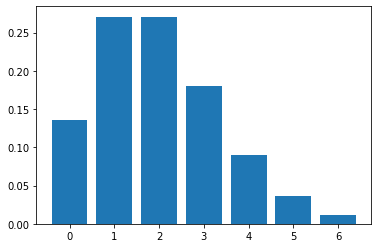

In [10]:
average = 2
stats.poisson(average).pmf(0) # getting the probability of no cars

# plotting a bar chart of the probability of 0 to 6 cars waiting in the line at noon
x = (0,1,2,3,4,5,6)
y = stats.poisson(average).pmf(x)
plt.bar(x,y)

In [11]:
stats.poisson(average).sf(2) # getting the probability of 3 or more cars

0.32332358381693654

In [14]:
stats.poisson(average).sf(0) # atleast one car means more than 0

0.8646647167633873

2.Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

What grade point average is required to be in the top 5% of the graduating class?
What GPA constitutes the bottom 15% of the class?
An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
If I have a GPA of 3.5, what percentile am I in?

In [77]:
# simulating with python
mean = 3.0
sd = 0.3
size = 100_000
trials = np.random.normal(mean, sd, size)
pd.Series(trials).quantile(.95) # grade point required to be in the top 5% of the graduating class

pd.Series(trials).quantile(.15) # GPA that constitutes the bottom 15%

pd.Series(trials).quantile(.20)# 3rd decile from the bottom is any students with GPA between 20th and 30th percentile
pd.Series(trials).quantile(.30) 

# (trials >=3.5).mean() # percentile range with GPA 3.5



2.744857330652451

In [72]:
mean = 3
sd = .3
stats.norm(mean, sd).isf(.05) # grade point average required to be on the top 5% of the class

3.4934560880854417

In [73]:
# grade point average that constitutes the bottom 15%
stats.norm(mean, sd).ppf(.15)


2.689069983151863

In [74]:

stats.norm(mean, sd).ppf([.2,.3,]) # getting the third decile from the bottom of the class for scholarship

array([2.74751363, 2.84267985])

In [37]:
stats.norm(mean,sd).pdf(3.5) # getting the percentile 3.5 GPA falls in

0.3315904626424956

3.A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [79]:
# python simulation
average = 0.02
trial = 4326
size = 100_000
trials = np.random.binomial(trial,0.02,size )
(trials > 97).mean() # gives the probability of getting 97 click when getting 4326 visitors with a success rate of 0.02


0.11782

In [78]:
average = 2/100
trials = 4326
stats.binom(trials,average).sf(96)

0.1397582363130086

4.You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

What is the probability that at least one of your first 60 answers is correct?

In [101]:
# python simulation

answers = (np.random.random(100)).round(2) # prpbability ranges from 0 to 1, and rounded to 100th place means
# we have 50 answer choices for each question

success = 1/len(answers) # liklihood of getting answer selected at random, correct

size = 100_000

trial = 60

((np.random.binomial(trial, success, size)) >=1).mean()




0.45282

In [89]:
answers = np.random.random(100) # first getting the random 50 values between 0 and 1 to get the possible answer choice
ans = answers.round(2) # rounding them to the 100th place
success = 1/len(ans) # getting the probability of correct answer chosen at random
success
trials = 60 # in order to see if we can get atleast one correct in first 60, set the trial number to 60
stats.binom(trials, success).sf(0) # getting atleast one correct means gettin the probability of value falling over 0

0.4528433576092388

5.The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [42]:
# python simulation to get the chance of getting the rest room cleaned
success = 0.03
trial = 0.9*3*22
size = 100_000
# getting the random success  of 1 or more meaning atleast one people will clean the restroom
# getting the mean of getting one or more 
(np.random.binomial(trial, success, size) >= 1).mean() # chance of getting it clean each day



0.83206

In [47]:
# python simulation to get the probability that the restroom goes two dats without cleaning
trials = np.random.binomial(trial, success, size = (100_000, 2)).reshape(100_000,2)

# indexing our dataframe with condition that the value is greater than 0,meaning there was atleast one person to 
# clean the breakroom we will get dataframe of boolean values
# summing the boolean values and equating them to 0, meaning the value was not greater than 0 for two days in a row


((trials>0).sum(axis = 1) == 0).mean()

0.02772

In [48]:
# probability of getting it not cleaned entire week
trials = np.random.binomial(trial, success, size = (100_000, 5)).reshape(100_000,5)
((trials>0).sum(axis = 1) == 0).mean()

0.0001

In [49]:
# probability distributions to get the probability of getting the rest room cleaned
success = 0.03
trials = 0.9*3*22
stats.binom(trials, success).sf(0)

0.8342199288437355

In [50]:
# probability of getting it not cleaned two days in a row
# two days in a row means we must multiply our trial by 2
success = 0.03
trials = 0.9*3*22 *2
stats.binom(trials, success).pmf(0)

0.026821436301629083

In [51]:
# probability of getting it not cleaned five days in a row
# two days in a row means we must multiply our trial by 5
success = 0.03
trials = 0.9*3*22 *5
stats.binom(trials, success).pmf(0)

0.00011781621791055166

#6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [55]:
# simulation with python
time_available = 60
mean_time = 15 * 2
sd_time = 3*2
time_to_order = 35 # so that you have 10 minutes to wait for your food, and 15 minutes to eat 


# getting the likelihood that waiting and ordering of the food is completed in less than 35 minutes
(np.random.normal(mean_time, sd_time, 100_000) <= 35).mean()

0.79727

In [8]:
mean_time = 15*2 # changing the average number of customer to time by multiplying by the time it takes to order food
sd = 3*2 # changing the standard deviation to time 
stats.norm(mean_time, sd).cdf(35) # in order to be able to wait 10 minutes and have 15 minutes to eat lunch,
# I should be able to finish ordering within 35 minutes

0.7976716190363569

7.Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

What percent of employees earn less than 60,000?

What percent of employees earn more than 95,000?

What percent of employees earn between 65,000 and 80,000?

What do the top 5% of employees make?

In [102]:
# simulation with python
mean = 72012
sd = 17310

# getting the percentage of employees earning less than or equal to 60,000
(np.random.normal(mean, sd, 100_000) <= 60_000).mean()








0.24421

In [103]:
# getting the percentage of employees earning more than 95,000
(np.random.normal(mean, sd, 100_000) > 95_000).mean()

0.09173

In [109]:
#What percent of employees earn between 65,000 and 80,000?

((np.random.normal(mean, sd, 100_000) < 80_000).mean())-((np.random.normal(mean, sd, 100_000) < 65_000).mean())

0.33635000000000004

In [110]:

#What do the top 5% of employees make?
pd.Series((np.random.normal(mean, sd, 100_000))).quantile(.95)

100358.25204559327

In [111]:
mean = 72012
sd = 17310
stats.norm(mean, sd).cdf(60000) * 100 # percentage of employee earning less than or equal to 60000





24.38617554963023

In [112]:
stats.norm(mean, sd).sf(95000) * 100 # percentage of employees earning more than 95000

9.208599994106093

In [113]:
in_between = stats.norm(mean, sd).cdf(80000) - stats.norm(mean,sd).cdf(65000) 
in_between * 100. # percentage of employees earning between 65000 and 80000

33.5060363819384

In [114]:
#What do the top 5% of employees make?
stats.norm(mean, sd).isf(.05)

100484.41628253